## Design domain and make bathymetry input file

**Under construction**

* Rotate fjord (is this too bad?)
* Smooth bathymetry
* Flatten open boundary

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from netCDF4 import Dataset
import numpy as np
import seaborn as sns

In [2]:
# Load bathy data
filename = "../beru_2022.nc"
nc = Dataset(filename, "r")
#nc

In [3]:
# Get lat, lon and elevation
elev = nc["elevation"][:]
lat = nc["latitude"][:]
lon = nc["longitude"][:]

The indices for the yellow box are: x1=450, x2=1050, y1=500, y2=770


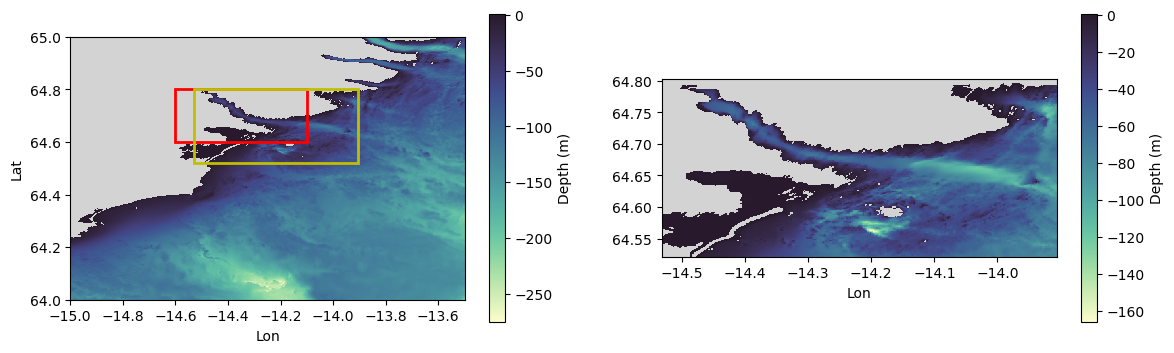

In [4]:
# Plot bathy data
fig, (ax,ax2) = plt.subplots(1,2, figsize=(14,4))
ax.set_facecolor("lightgray")
ax2.set_facecolor("lightgray")

## Plot all data
pc = ax.pcolormesh(lon,lat,elev, cmap=cmo.cm.deep)
plt.colorbar(pc, ax=ax, label= "Depth (m)")
# Draw region of interest
ax.add_patch(Rectangle((-14.6, 64.6), 0.5, 0.2, #((origin), w, h)
                       ec = "r", 
                       fill = False, 
                       lw = 2)) 

## Plot only region of interest
inix = 450
iniy = 500
dx = 600
dy = 270
endx = inix + dx
endy = iniy + dy
w_lon = lon[endx] - lon[inix]
h_lat = lat[endy] - lat[iniy]

pc2 = ax2.pcolormesh(lon[inix:endx],lat[iniy:endy],elev[iniy:endy, inix:endx], cmap=cmo.cm.deep)
plt.colorbar(pc2, ax=ax2, label= "Depth (m)")
# Draw region of interest in ax to check location
ax.add_patch(Rectangle((lon[inix], lat[iniy]), w_lon, h_lat, #((origin), w, h)
                       ec = "y", 
                       fill = False, 
                       lw = 2)) 
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")
ax2.set_xlabel("Lon")
ax.set_aspect(1)
ax2.set_aspect(1)
print(f"The indices for the yellow box are: x1={inix}, x2={endx}, y1={iniy}, y2={endy}")
plt.show()

Red square: region of interest, yellow square: domain on the right panel.

### Rotate fjord
First, this is a tiny portion of Earth so I'll make everything distances (x, y), not angles (lat, lon). Then I'll rotate x and y.

In [5]:
def distance(lat1,lon1,lat2,lon2):
    '''Get distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d
def cartesian(longitude, latitude):   
    R = 6378137.0 #+ elevation, but not for this. relative to centre of the earth
    X = R * np.cos(np.deg2rad(longitude)) * np.cos(np.deg2rad(latitude))    
    Y = R * np.sin(np.deg2rad(longitude)) * np.cos(np.deg2rad(latitude))        
    return X, Y

In [44]:
LON, LAT = np.meshgrid(lon, lat)
X,Y = cartesian(LON,LAT)

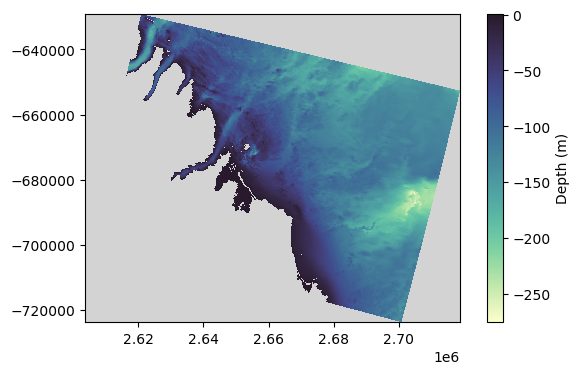

In [49]:
# Plot bathy data
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.set_facecolor("lightgray")

## Plot all data
pc = ax.pcolormesh(X,Y,elev, cmap=cmo.cm.deep)
plt.colorbar(pc, ax=ax, label= "Depth (m)")
# Draw region of interest
ax.set_aspect(1)
plt.show()

oops...